In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCPython import createPitch
import json
from pandas.io.json import json_normalize

In [2]:
pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 400 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

In [3]:
# Read json and store as df
competition = pd.read_json('../open-data/data/competitions.json')
competition.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
# Filter to just return champions league events
competition[competition.competition_name == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,106,International,FIFA World Cup,male,False,True,2022,2023-06-07T18:13:08.086293,2023-06-07T18:14:13.168183,2023-06-07T18:14:13.168183,2023-06-07T18:13:08.086293
19,43,3,International,FIFA World Cup,male,False,True,2018,2022-09-05T17:17:56.670896,2021-06-13T16:17:31.694,None,2022-09-05T17:17:56.670896


In [5]:
with open('../open-data/data/matches/43/106.json') as f:
    data = json.load(f)
    for i in data:
        print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], '-', i['away_score'], i['away_team']['away_team_name'])

ID: 3857256 Serbia 2 - 3 Switzerland
ID: 3869151 Argentina 2 - 1 Australia
ID: 3857257 Australia 1 - 0 Denmark
ID: 3857258 Brazil 2 - 0 Serbia
ID: 3857288 Tunisia 0 - 1 Australia
ID: 3857267 Ecuador 1 - 2 Senegal
ID: 3869321 Netherlands 2 - 2 Argentina
ID: 3857287 Uruguay 0 - 0 South Korea
ID: 3869486 Morocco 1 - 0 Portugal
ID: 3869685 Argentina 3 - 3 France
ID: 3857260 Saudi Arabia 1 - 2 Mexico
ID: 3857264 Poland 0 - 2 Argentina
ID: 3857266 France 2 - 1 Denmark
ID: 3857289 Argentina 2 - 0 Mexico
ID: 3857269 Brazil 1 - 0 Switzerland
ID: 3857294 Netherlands 2 - 0 Qatar
ID: 3869254 Portugal 6 - 1 Switzerland
ID: 3869118 England 3 - 0 Senegal
ID: 3869684 Croatia 2 - 1 Morocco
ID: 3869519 Argentina 3 - 0 Croatia
ID: 3869354 England 1 - 2 France
ID: 3869552 France 2 - 0 Morocco
ID: 3869420 Croatia 1 - 1 Brazil
ID: 3869220 Morocco 0 - 0 Spain
ID: 3869219 Japan 1 - 1 Croatia
ID: 3869253 Brazil 4 - 1 South Korea
ID: 3869152 France 3 - 1 Poland
ID: 3869117 Netherlands 3 - 1 United States
ID: 38

In [6]:
with open('../open-data/data/events/3857271.json') as f:
    engira = json.load(f)
    
len(engira)

3649

In [7]:
df = pd.json_normalize(engira, sep='_').assign(match_id="3857271")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Columns: 120 entries, id to match_id
dtypes: float64(32), int64(9), object(79)
memory usage: 3.3+ MB


In [8]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head()
shots.loc[shots['shot_outcome_name'] == 'Goal', ['period', 'player_name', 'location']]

,period,player_name,location
id,,,
f6ab1f9f-49b3-4159-9229-2d6468444c80,1,Jude Bellingham,"[112.0, 38.0]"
fb8746d5-622f-4d58-94c4-d1b98a5383e5,1,Bukayo Saka,"[104.1, 38.5]"
87851dd9-302c-42ec-955b-812c658adf08,1,Raheem Sterling,"[111.0, 42.8]"
c00d9764-b99c-4ee2-a5eb-f15a6119bc8f,2,Bukayo Saka,"[105.3, 46.3]"
792de1ce-2b57-4766-9925-36b991f4f753,2,Mehdi Taremi,"[109.7, 48.0]"
055f83c8-62eb-421d-81d0-5894c99d4f0a,2,Marcus Rashford,"[109.7, 47.7]"
f4005cfd-ba86-4655-87b4-31b1980494bb,2,Jack Grealish,"[112.0, 39.9]"
2cfc5d86-7083-4975-95c7-e67c3a7439c9,2,Mehdi Taremi,"[108.0, 40.0]"


In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [10]:
shots.columns.values

array(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'tactics_lineup',
       'related_events', 'location', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle',
       'pass_height_id', 'pass_height_name', 'pass_end_location',
       'pass_body_part_id', 'pass_body_part_name', 'pass_type_id',
       'pass_type_name', 'carry_end_location', 'under_pressure',
       'pass_aerial_won', 'pass_outcome_id', 'pass_outcome_name',
       'duel_type_id', 'duel_type_name', 'clearance_left_foot',
       'clearance_body_part_id', 'clearance_body_part_name', 'pass_cross',
       'ball_receipt_outcome_id', 'ball_receipt_outcome_name',
       'clearance_aerial_won', 'clearance_head', 'out', 'pass_switch',


{(104.1, 38.5), (112.0, 39.9), (105.3, 46.3), (112.0, 38.0), (111.0, 42.8), (109.7, 47.7)}
{(109.7, 48.0), (108.0, 40.0)}


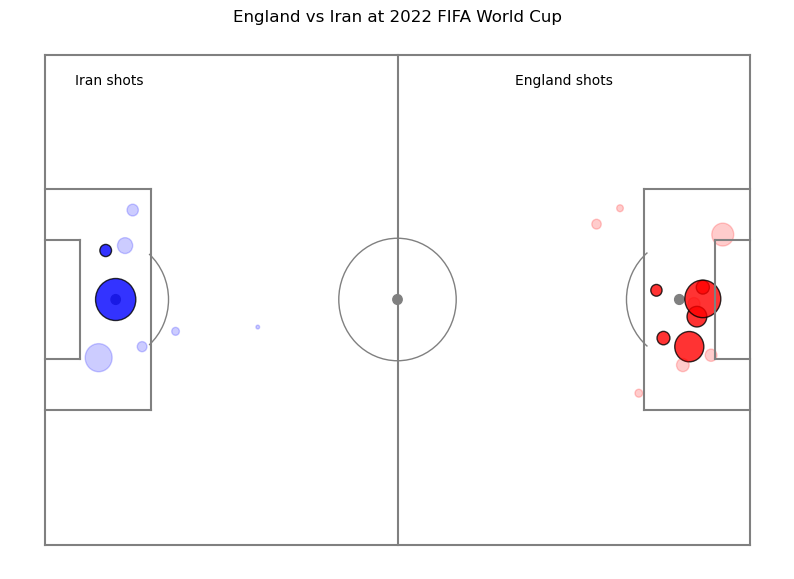

In [11]:
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

home_team = 'England'
away_team = 'Iran'
home_goal_positions = set()
away_goal_positions = set()

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    in_game = shot['period'] != 5
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team and in_game:
        if goal:
            diff = 1
            pos = (x, y)
            if pos in home_goal_positions:
                diff = -diff
            else:
                home_goal_positions.update([pos])
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, facecolor='red', edgecolor='black')
            shot_circle.set_alpha(.8)
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            diff = 1
            pos = (x, y)
            if pos in away_goal_positions:
                diff = -diff
            else:
                away_goal_positions.update([pos])
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, facecolor='blue', edgecolor='black')
            shot_circle.set_alpha(.8)
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
print(home_goal_positions)
print(away_goal_positions)
plt.text(5, 75, away_team + ' shots')
plt.text(80, 75, home_team + ' shots')

plt.title('England vs Iran at 2022 FIFA World Cup')

fig.set_size_inches(10, 7)
fig.savefig('argfra_shots.png', dpi=300) 

plt.show()

## Shotmap for specific player

In [12]:
rashford_shot = shots[shots['player_name'] == 'Bukayo Saka']

In [13]:
rashford_shot['location']

id
3ba35261-6891-4612-b191-d65a0d78f0a4    [101.1, 55.3]
fb8746d5-622f-4d58-94c4-d1b98a5383e5    [104.1, 38.5]
c00d9764-b99c-4ee2-a5eb-f15a6119bc8f    [105.3, 46.3]
Name: location, dtype: object

55.3
38.5
46.3
{(104.1, 38.5), (112.0, 39.9), (105.3, 46.3), (112.0, 38.0), (111.0, 42.8), (109.7, 47.7)}
{(109.7, 48.0), (108.0, 40.0)}


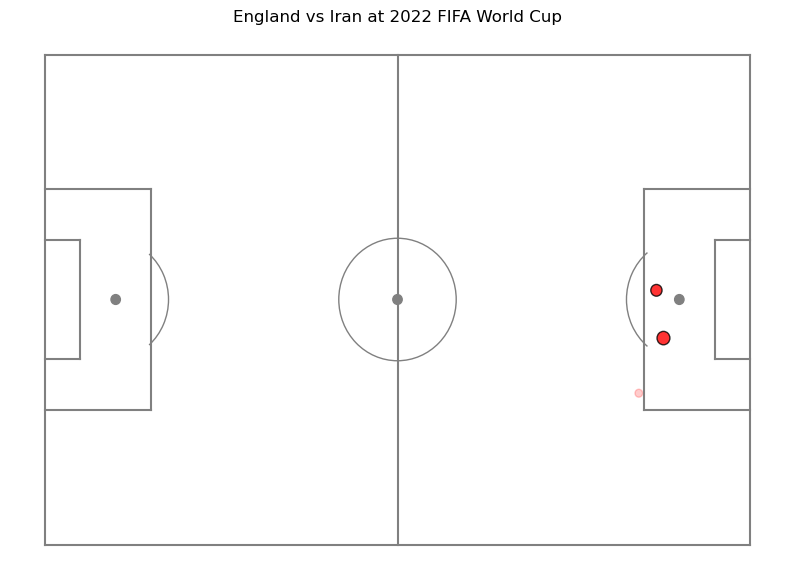

In [14]:
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for i, shot in rashford_shot.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    print(y)
    
    goal = shot['shot_outcome_name']=='Goal'
    
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    if goal:
        shot_circle = plt.Circle((x, pitch_height-y), circle_size, facecolor='red', edgecolor='black')
        shot_circle.set_alpha(.8)
    else:
        shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
        shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
print(home_goal_positions)
print(away_goal_positions)


plt.title('England vs Iran at 2022 FIFA World Cup')

fig.set_size_inches(10, 7)
fig.savefig('argfra_shots.png', dpi=300) 

plt.show()

## Pass map for specific player

In [16]:
with open('../open-data/data/events/3857261.json') as f:
    wal_eng = json.load(f)
    
len(wal_eng)

3316

In [17]:
we = pd.json_normalize(wal_eng, sep='_').assign(match_id="3857261")
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Columns: 120 entries, id to match_id
dtypes: float64(33), int64(9), object(78)
memory usage: 3.0+ MB


In [18]:
we.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,under_pressure,duel_type_id,duel_type_name,pass_aerial_won,counterpress,pass_switch,clearance_left_foot,clearance_body_part_id,clearance_body_part_name,clearance_head,clearance_aerial_won,out,pass_miscommunication,dribble_overrun,dribble_outcome_id,dribble_outcome_name,foul_won_defensive,off_camera,duel_outcome_id,duel_outcome_name,interception_outcome_id,interception_outcome_name,pass_assisted_shot_id,pass_shot_assist,pass_through_ball,pass_technique_id,pass_technique_name,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_first_time,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,miscontrol_aerial_won,clearance_right_foot,foul_committed_type_id,foul_committed_type_name,pass_cross,goalkeeper_end_location,shot_one_on_one,shot_aerial_won,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,50_50_outcome_id,50_50_outcome_name,foul_committed_card_id,foul_committed_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,ball_recovery_offensive,pass_outswinging,ball_recovery_recovery_failure,pass_inswinging,pass_no_touch,pass_straight,pass_goal_assist,shot_deflected,block_deflection,match_id
0,ef50f27e-8b64-4185-ba52-2e622d7ebe38,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,907,Wales,1,Regular Play,907,Wales,4231.0,"[{'player': {'id': 9914, 'name': 'Danny Ward'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 12}, {'player': {'id': 34794, 'name': 'Neco Williams'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 3}, {'player': {'i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857261
1,87729e4d-8838-4cae-b7cb-ca8b22af6cff,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,907,Wales,1,Regular Play,768,England,433.0,"[{'player': {'id': 3468, 'name': 'Jordan Pickford'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1}, {'player': {'id': 3205, 'name': 'Kyle Walker'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 2}, {'player': {'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857261
2,a3f9ce51-db7f-449a-902f-f4a595330b13,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,907,Wales,1,Regular Play,907,Wales,NaN,NaN,[5c4cab8f-dfac-47de-bca4-3ca4d211f915],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [19]:
bool = (we['player_name'] == 'Danny Ward') & (we['type_name'] == 'Pass') #& ((we['pass_body_part_name']  == 'Keeper Arm') | (we['pass_body_part_name'] == 'Drop Kick'))
passes_1st = we.loc[bool, ['pass_length', 'pass_angle', 'pass_end_location', 'location', 'player_name', 'pass_body_part_name']]
passes_1st.head(100)

,pass_length,pass_angle,pass_end_location,location,player_name,pass_body_part_name
61,51.393093,-0.980635,"[39.6, 3.6]","[11.0, 46.3]",Danny Ward,Right Foot
272,48.633835,0.383561,"[52.2, 57.8]","[7.1, 39.6]",Danny Ward,Right Foot
645,64.014140,-0.595368,"[59.0, 0.1]","[6.0, 36.0]",Danny Ward,Right Foot
733,64.963760,-0.264767,"[68.7, 19.0]","[6.0, 36.0]",Danny Ward,Right Foot
748,46.620380,0.685126,"[49.4, 66.8]","[13.3, 37.3]",Danny Ward,Right Foot
992,68.374050,0.168996,"[79.7, 14.7]","[12.3, 3.2]",Danny Ward,Right Foot
1180,28.958073,0.423484,"[36.5, 48.4]","[10.1, 36.5]",Danny Ward,Right Foot
1274,71.076930,-0.409510,"[80.0, 3.2]","[14.8, 31.5]",Danny Ward,Right Foot
1319,65.671074,0.674265,"[57.3, 77.0]","[6.0, 36.0]",Danny Ward,Right Foot
1374,69.095950,0.457175,"[68.0, 74.5]","[6.0, 44.0]",Danny Ward,Right Foot


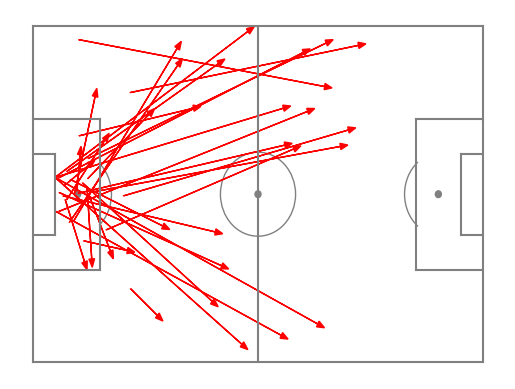

In [20]:
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for a_pass in passes_1st.iterrows():
    length = a_pass[1][0]
    angle = a_pass[1][1]
    x_end = a_pass[1][2][0] 
    y_end = pitch_height-a_pass[1][2][1]
    x_start = a_pass[1][3][0]
    y_start = pitch_height-a_pass[1][3][1]
    plt.arrow(x_start, y_start, x_end-x_start, y_end - y_start, color='red', head_width=1.5, head_length=2, length_includes_head=True)

## Average Position for a specific player

In [21]:
bool = (we['player_name'] == 'Harry Maguire') #& (we['type_name'] == 'Pass')

In [44]:
locations = we.loc[bool, ['location', 'player_name']]

(41.01, 24.86)


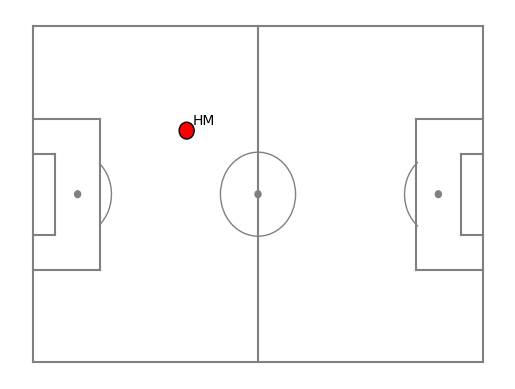

In [53]:
total_x = 0
total_y = 0
rows = 0
for i, event in locations.iterrows():
    x = event['location'][0]
    y = event['location'][1]
    total_x += x
    total_y += y
    rows+=1
    
average_x = np.round(total_x / rows, 2)
average_y = np.round(total_y / rows, 2)
print(f"({average_x}, {average_y})")

pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

adj_y = pitch_height - average_y

circle_size = 2

position = plt.Circle((average_x, adj_y), circle_size, facecolor='red', edgecolor='black')

initial = ''

for letter in event['player_name'].split(' '):
    initial += letter[0]
    
plt.text(x=average_x+1.5, y=adj_y+1.5, s=initial)
ax.add_patch(position)

plt.show()

## Team Average Positions 1st Half

In [79]:
bool = (we['team_name'] == 'England') & (we['period'] == 1) & (we['player_name'].notnull()) & (we['location'].notnull())

In [80]:
eng_actions = we[bool]

In [81]:
eng_players = eng_actions['player_name'].unique()

In [88]:
def calc_avg_pos(df, player):
    # Get all the rows for a given player
    locations = df.loc[df['player_name'] == player, ['location', 'player_name']]
    
    total_x = 0
    total_y = 0
    rows = 0
    for i, event in locations.iterrows():
        x = event['location'][0]
        y = event['location'][1]
        total_x += x
        total_y += y
        rows+=1
    
    average_x = np.round(total_x / rows, 2)
    average_y = np.round(total_y / rows, 2)
    print(f"{player}: ({average_x}, {average_y})")
    adj_y = 80 - average_y
    
    return [average_x, adj_y]

Declan Rice: (66.02, 34.21)
Philip Foden: (84.35, 64.76)
John Stones: (47.84, 52.92)
Harry Kane: (82.73, 39.01)
Jordan Brian Henderson: (74.99, 59.72)
Jude Bellingham: (72.85, 37.84)
Kyle Walker: (66.7, 64.66)
Harry Maguire: (46.53, 28.36)
Marcus Rashford: (81.36, 16.96)
Jordan Pickford: (17.08, 41.46)
Luke Shaw: (72.08, 10.83)


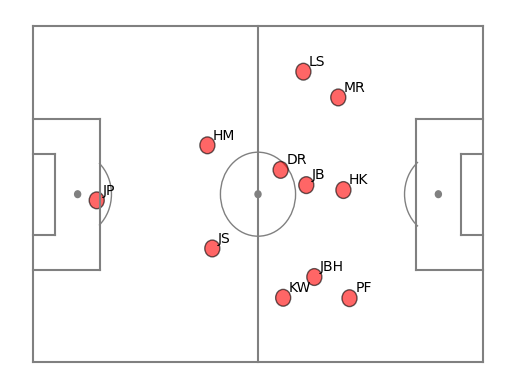

In [96]:
# Initalise the graph
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

# Adding the average positions
for player in eng_players:
    avg_x, avg_y = calc_avg_pos(eng_actions, player)
    player_pos = plt.Circle((avg_x, avg_y), 2, facecolor='red', edgecolor='black')
    player_pos.set_alpha(.6)
    ax.add_patch(player_pos)
    
    initial = ''
    for letter in player.split(' '):
        initial += letter[0]
        
    plt.text(x=avg_x+1.5, y=avg_y+1.5, s=initial)

plt.show()

In [97]:
# Plot both teams
bool = (we['team_name'] == 'Wales') & (we['period'] == 1) & (we['player_name'].notnull()) & (we['location'].notnull())
wal_actions = we[bool]
wal_players = wal_actions['player_name'].unique()

Declan Rice: (66.02, 34.21)
Philip Foden: (84.35, 64.76)
John Stones: (47.84, 52.92)
Harry Kane: (82.73, 39.01)
Jordan Brian Henderson: (74.99, 59.72)
Jude Bellingham: (72.85, 37.84)
Kyle Walker: (66.7, 64.66)
Harry Maguire: (46.53, 28.36)
Marcus Rashford: (81.36, 16.96)
Jordan Pickford: (17.08, 41.46)
Luke Shaw: (72.08, 10.83)
Aaron Ramsey: (58.98, 37.85)
Ben Davies: (38.85, 11.09)
Kieffer Roberto Francisco Moore: (67.58, 33.44)
Joe Rodon: (34.94, 32.09)
Ethan Ampadu: (44.98, 28.28)
Daniel James: (57.98, 16.36)
Joe Allen: (53.46, 47.28)
Chris Mepham: (33.21, 55.77)
Danny Ward: (8.91, 39.04)
Neco Williams: (41.13, 69.66)
Gareth Frank Bale: (53.9, 57.9)
Connor Roberts: (58.65, 71.36)


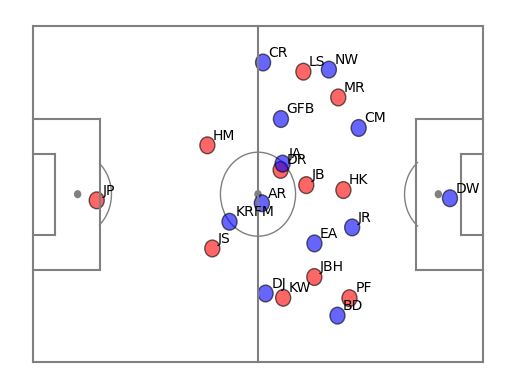

In [100]:
# Initalise the graph
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

# Adding the average positions for england (home team)
for player in eng_players:
    avg_x, avg_y = calc_avg_pos(eng_actions, player)
    player_pos = plt.Circle((avg_x, avg_y), 2, facecolor='red', edgecolor='black')
    player_pos.set_alpha(.6)
    ax.add_patch(player_pos)
    
    initial = ''
    for letter in player.split(' '):
        initial += letter[0]
        
    plt.text(x=avg_x+1.5, y=avg_y+1.5, s=initial)
    
# Adding the average positions for wales (home team)
for player in wal_players:
    avg_x, avg_y = calc_avg_pos(wal_actions, player)
    # Adjust for away team
    adj_x = pitch_width - avg_x
    adj_y = pitch_height - avg_y
    player_pos = plt.Circle((adj_x, adj_y), 2, facecolor='blue', edgecolor='black')
    player_pos.set_alpha(.6)
    ax.add_patch(player_pos)
    
    initial = ''
    for letter in player.split(' '):
        initial += letter[0]
        
    plt.text(x=adj_x+1.5, y=adj_y+1.5, s=initial)

plt.show()

## Heatmap

In [141]:
heats = np.zeros((121,81), int)

In [142]:
print(heats[120,80])

0


In [143]:
bool = (we['player_name'] == 'Harry Maguire') & (we['location'].notnull())

In [144]:
player_touches = we[bool]

In [145]:
for i, touch in player_touches.iterrows():
    x = np.round(touch['location'][0]).astype(int)
    y = np.round(touch['location'][1]).astype(int)
    heats[x, y] += 1
    #print(f"({x}, {y})")
print(np.max(heats))

4


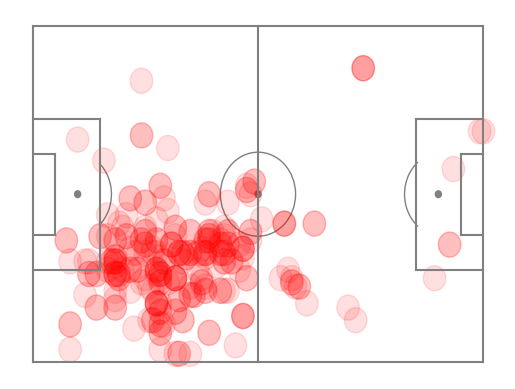

In [148]:
scale = np.max(heats)

# Initalise the graph
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for i in range(121):
    for j in range(81):
        heat_circle = plt.Circle((i, j), 3, color='red')
        heat_circle.set_alpha(heats[i,j] / 8)
        ax.add_patch(heat_circle)

## Touchmap

In [149]:
player_touches = we[(we['player_name'] == 'Harry Kane') & (we['location'].notnull())]

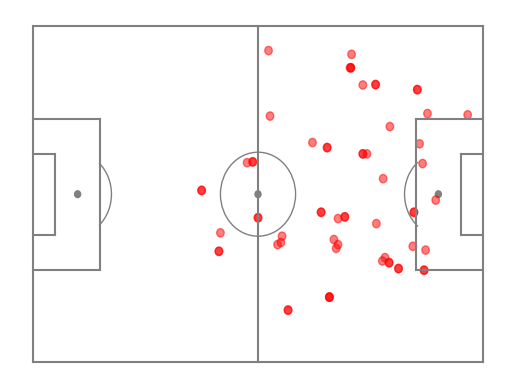

In [153]:
# Initalise the graph
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for i, touch in player_touches.iterrows():
    x = touch['location'][0]
    y = touch['location'][1]
    touch = plt.Circle((x, y), 1, color='red')
    touch.set_alpha(.5)
    ax.add_patch(touch)
    
